## Harris corner detection

이미지 매칭 시 이미지 특징점들을 서로 비교
이미지의 특징점(keypoints)으로 물체의 **모서리**나 **코너**를 검출

해리스 코너 검출은 영상을 이동시키며 이동한 변화량(R) 계산

- 2차 모멘트 행렬 A가 다음과 같을 때,

<img src="img/func_a.PNG" alt='funca'>

- A를 간단하게 표현하면,

<img src="img/func_a1.PNG" alt='funca1'>

- 특징 가능성 R은

<img src="img/func_r.PNG" alt='funcr'>


<img src="img/harris_region.jpg" alt='region' width="50%" height="50%">

### Practice

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

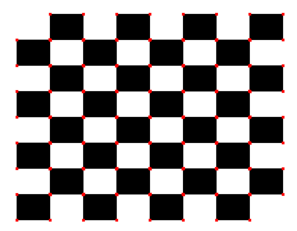

In [47]:
img = cv2.imread('chessboard.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(src=gray, # 1-채널 이미지
                       blockSize=2, # 코너 검출 시 고려할 이웃 픽셀 거리
                       ksize=3, # Sobel 마스크의 크기
                       k=0.04) # 해리스 코너 검출 조절 파라미터

# 특징점을 크게 보기 위하여 팽창 모폴로지 연산 수행
dst = cv2.dilate(dst, None, iterations=3)

## 원하는 특징을 검출하기 위한 임계값 설정
# img[dst > 0.01*dst.max()] = [0,0,255]
img[dst > 0.01] = [0,0,255]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

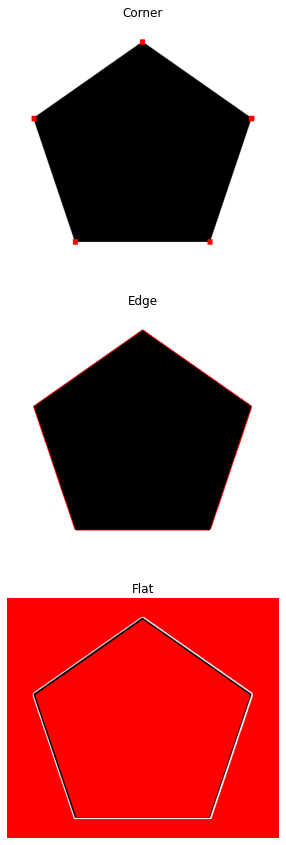

In [95]:
img = cv2.imread('polygon.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

corner = img.copy()
edge = img.copy()
flat = img.copy()

## 원하는 특징을 검출하기 위한 임계값 설정
edge[dst < -0.01] = [0,0,255]
flat[dst == 0] = [0,0,255]

dst = cv2.dilate(dst, None, iterations=4)
corner[dst > 0.01] = [0,0,255]

plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
corner = cv2.cvtColor(corner, cv2.COLOR_BGR2RGB)
plt.imshow(corner)
plt.title('Corner')
plt.axis('off')

plt.subplot(3, 1, 2)
edge = cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)
plt.imshow(edge)
plt.title('Edge')
plt.axis('off')

plt.subplot(3, 1, 3)
flat = cv2.cvtColor(flat, cv2.COLOR_BGR2RGB)
plt.imshow(flat)
plt.title('Flat')
plt.axis('off')

plt.show()

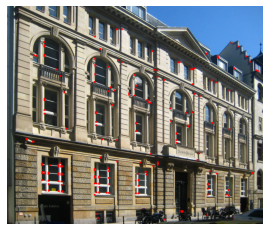

In [94]:
img = cv2.imread('building.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(src=gray, # 1-채널 이미지
                       blockSize=3, # 코너 검출 시 고려할 이웃 픽셀 거리
                       ksize=3, # Sobel 마스크의 크기
                       k=0.04) # 해리스 코너 검출 조절 파라미터

# 특징점을 크게 보기 위하여 팽창 모폴로지 연산 수행
dst = cv2.dilate(dst, None, iterations=2)

## 원하는 특징을 검출하기 위한 임계값 설정
# img[dst > 0.01*dst.max()] = [0,0,255]
img[dst > 0.01] = [0,0,255]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

### 해리스 코너 검출을 개선한 시-토마시(Shi & Tomasi) 검출

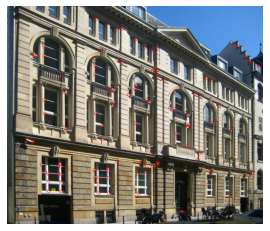

In [88]:
img = cv2.imread('building.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 시-토마스의 코너 검출 메서드
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=5)
# 실수 좌표를 정수 좌표로 변환
corners = np.int32(corners)

# 좌표에 동그라미 표시
for corner in corners:
    x, y = corner[0]
    cv2.circle(img, (x, y), 5, (0,0,255), 1, cv2.LINE_AA)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
